<a href="https://colab.research.google.com/github/alvredo5/komputer_grafis/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

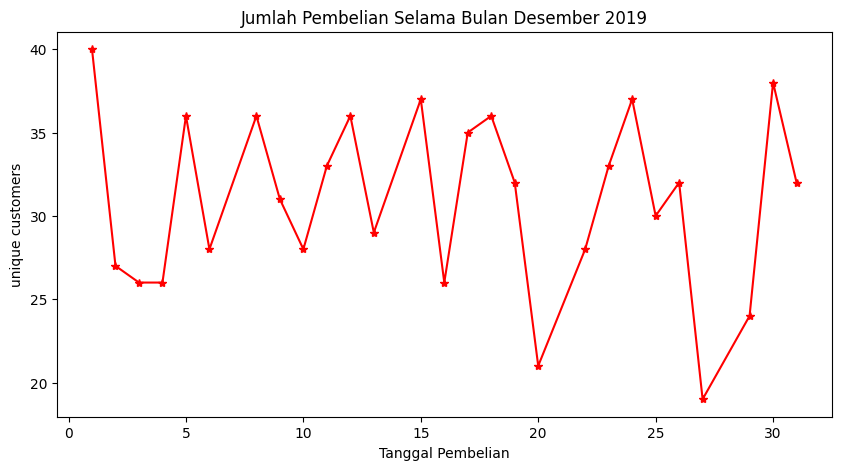

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
#mengambil Data
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv',parse_dates=['order_date'])
#memilih data yang ditampilkan ( bulan desember & pembeli tiap hari )
data_december = dataset[(dataset['order_date'].dt.month == 12) & (dataset['order_date'].dt.year == 2019)]
daily_customers = data_december.groupby(data_december['order_date'].dt.day)['customer_id'].nunique()
#membuat tampilan
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='*', linestyle='-', color='r')
#memberi tulisan
plt.title('Jumlah Pembelian Selama Bulan Desember 2019')
plt.xlabel('Tanggal Pembelian')
plt.ylabel('unique customers')
plt.show()

In [ ]:
# Menghitung jumlah produk terjual per brand
brand_product_count = data_december.groupby('brand')['quantity'].sum().reset_index()
# Mengurutkan berdasarkan jumlah produk terjual secara menurun
brand_product_count_sorted = brand_product_count.sort_values('quantity', ascending=False)
# Menampilkan brand top 5
top_5_brands = brand_product_count_sorted.head(5)
# Menampilkan brand top 5
print("Penjualan Brand TOP 5:")
for index, row in top_5_brands.iterrows():
    print(f"{row['brand']}: {row['quantity']} produk terjual")



Penjualan Brand TOP 5:
BRAND_S: 2197 produk terjual
BRAND_P: 2194 produk terjual
BRAND_R: 1508 produk terjual
BRAND_C: 1365 produk terjual
BRAND_A: 1315 produk terjual


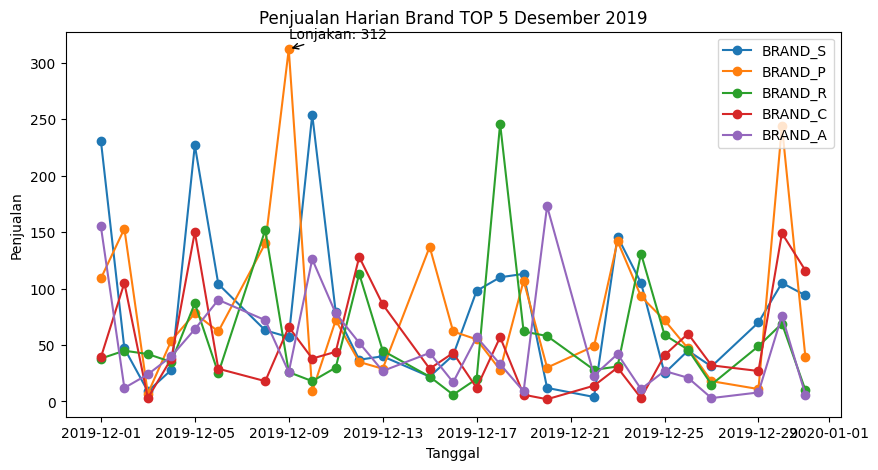

In [ ]:
# Menghitung daily quantity terjual per brand
daily_quantity = data_december.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()
# Mengambil top 5 brand
top_5_brands = data_december.groupby('brand')['quantity'].sum().nlargest(5).index
# Membuat line chart per brand top 5
plt.figure(figsize=(10, 5))
lonjakan_tanggal = None
lonjakan_quantity = None
for brand in top_5_brands:
    brand_data = daily_quantity[daily_quantity['brand'] == brand]
    plt.plot(brand_data['order_date'], brand_data['quantity'], marker='o', linestyle='-', label=brand)
    # Mencari tanggal dengan quantity terbesar untuk setiap brand
    tanggal_lonjakan = brand_data.loc[brand_data['quantity'].idxmax(), 'order_date']
    quantity_lonjakan = brand_data.loc[brand_data['quantity'].idxmax(), 'quantity']
    # Memperbarui informasi lonjakan jika ditemukan tanggal dengan quantity lebih tinggi
    if lonjakan_quantity is None or quantity_lonjakan > lonjakan_quantity:
        lonjakan_tanggal = tanggal_lonjakan
        lonjakan_quantity = quantity_lonjakan
# Menambahkan anotasi pada titik lonjakan
plt.annotate(f'Lonjakan: {lonjakan_quantity}',
             xy=(lonjakan_tanggal, lonjakan_quantity),
             xytext=(lonjakan_tanggal, lonjakan_quantity + 10),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='left')
# Menambahkan judul, label sumbu, dan legenda
plt.title('Penjualan Harian Brand TOP 5 Desember 2019')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.legend()
# Menampilkan line chart
plt.show()

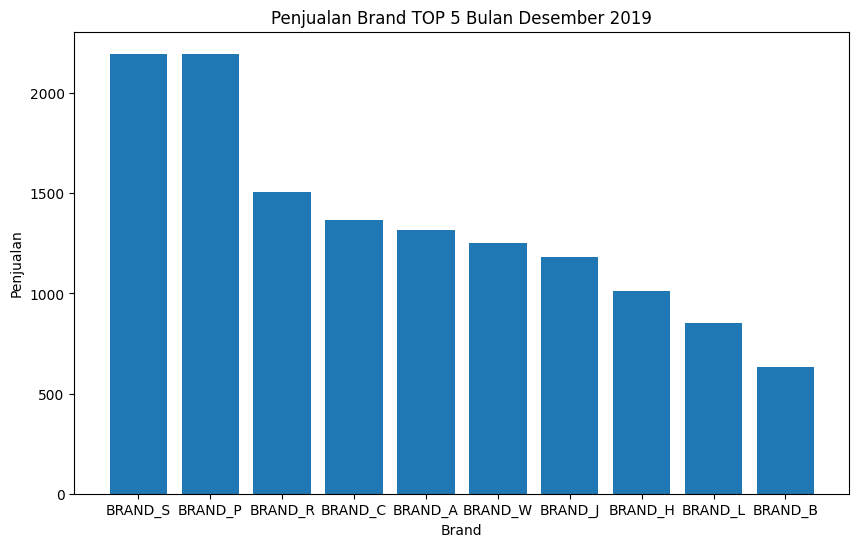

In [ ]:
# Menampilkan bar chart jumlah produk terjual per brand
plt.figure(figsize=(10, 6))
plt.bar(brand_product_count_sorted['brand'], brand_product_count_sorted['quantity'])
# Menambahkan judul dan label sumbu
plt.title('Penjualan Brand TOP 5 Bulan Desember 2019')
plt.xlabel('Brand')
plt.ylabel('Penjualan')
# Menampilkan chart
plt.show()

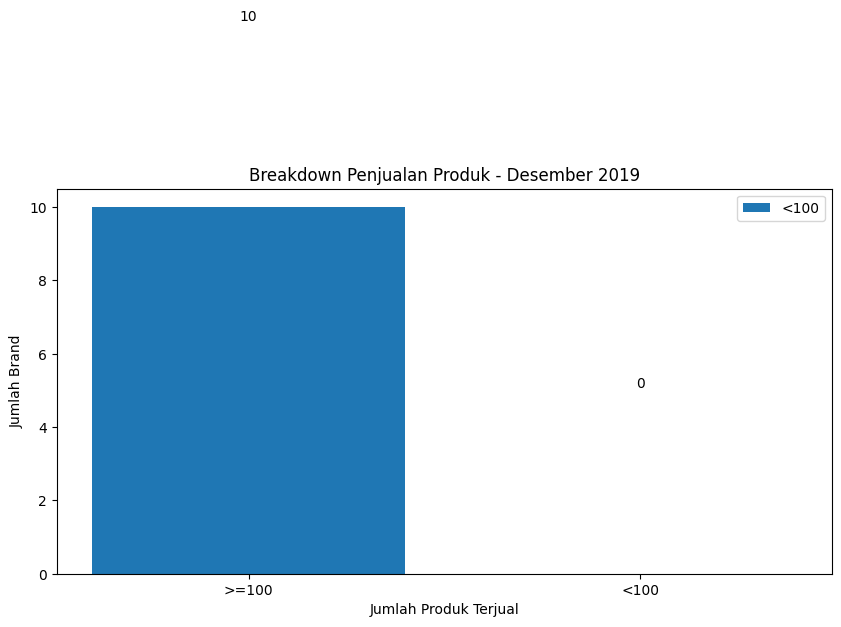

In [ ]:
# Membuat kategori '>=100' dan '<100' berdasarkan jumlah produk terjual
brand_product_count_sorted['category'] = pd.cut(brand_product_count_sorted['quantity'], bins=[0, 100, float('inf')], labels=['<100', '>=100'])
# Menghitung jumlah brand pada setiap kategori
category_counts = brand_product_count_sorted['category'].value_counts()
# Membuat stacked chart
plt.figure(figsize=(10, 5))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Jumlah Brand')
plt.title('Breakdown Penjualan Produk - Desember 2019')
plt.legend(['<100', '>=100'])
# Menambahkan label pada setiap bar
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
# Menampilkan chart
plt.show()

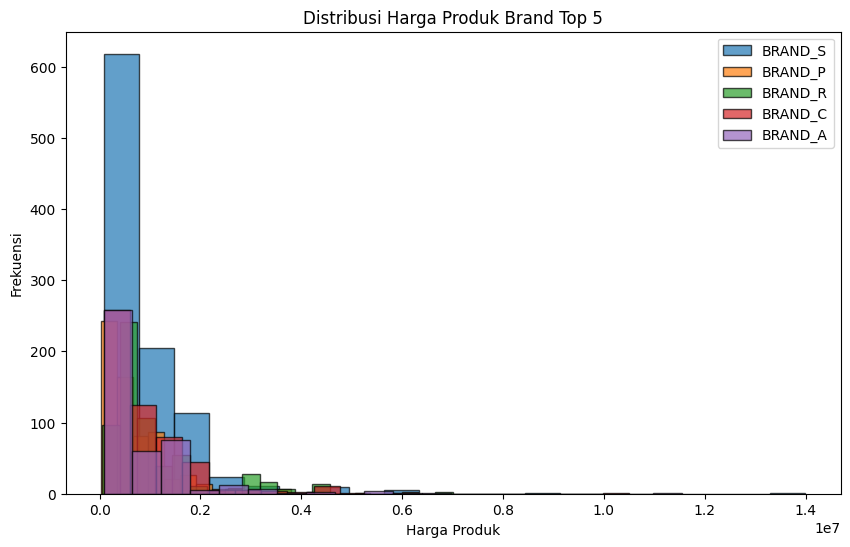

In [ ]:
# Filter data untuk brand top 5
top_5_brands = brand_product_count_sorted.head(5)
# Filter data berdasarkan brand top 5
top_5_data = dataset[dataset['brand'].isin(top_5_brands['brand'])]
# Mengambil median harga per brand
brand_median_prices = top_5_data.groupby('brand')['item_price'].median()
# Membuat histogram
plt.figure(figsize=(10, 6))
for brand in top_5_brands['brand']:
    brand_data = top_5_data[top_5_data['brand'] == brand]
    plt.hist(brand_data['item_price'], bins=20, edgecolor='black', alpha=0.7, label=brand)
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga Produk Brand Top 5')
plt.legend()
# Menampilkan histogram
plt.show()

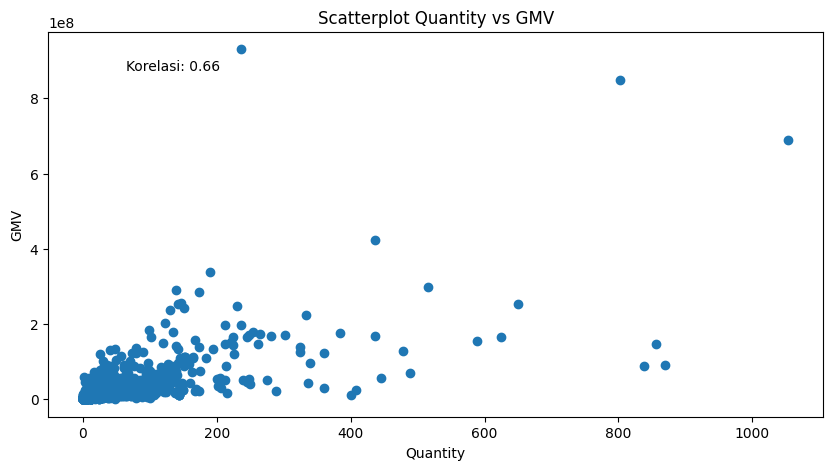

In [ ]:
# Menghitung GMV (quantity * item_price)
dataset['GMV'] = dataset['quantity'] * dataset['item_price']
# Mengambil dataset product_id, quantity, GMV, dan item_price
data_product = dataset.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()
# Scatterplot quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(data_product['quantity'], data_product['GMV'])
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.title('Scatterplot Quantity vs GMV')
# Menghitung korelasi antara quantity dan GMV
correlation_gmv = data_product['quantity'].corr(data_product['GMV'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_gmv:.2f}', transform=plt.gca().transAxes)
# Menampilkan scatterplot
plt.show()

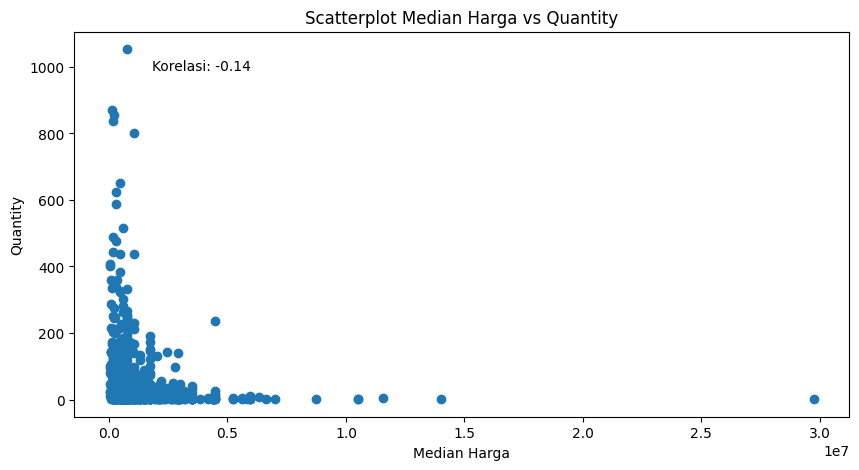

In [ ]:
# Menghitung GMV (quantity * item_price)
dataset['GMV'] = dataset['quantity'] * dataset['item_price']
# Mengambil dataset product_id, quantity, GMV, dan item_price
data_product = dataset.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()
# Scatterplot median harga vs quantity
plt.figure(figsize=(10, 5))
plt.scatter(data_product['item_price'], data_product['quantity'])
plt.xlabel('Median Harga')
plt.ylabel('Quantity')
plt.title('Scatterplot Median Harga vs Quantity')
# Menghitung korelasi antara median harga dan quantity
correlation_price = data_product['item_price'].corr(data_product['quantity'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_price:.2f}', transform=plt.gca().transAxes)
# Menampilkan scatterplot
plt.show()